In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split

In [2]:
pip install yfinance

In [7]:
#Get the data for Wipro Limited
ticker = "WIT"

#Download the data
data = yf.download(ticker, start="2021-06-21", end="2024-07-20")

[*********************100%%**********************]  1 of 1 completed


In [8]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-21,7.89,7.95,7.85,7.94,7.825024,1572000
2021-06-22,7.98,8.09,7.98,8.07,7.953141,2026600
2021-06-23,7.91,7.91,7.78,7.79,7.677196,1860200
2021-06-24,7.95,7.97,7.87,7.87,7.756037,1551900
2021-06-25,7.90,7.92,7.81,7.83,7.716616,1377800



#2. Select the Target Variable and Clean the data

In [9]:
# Select the Target Varibale Adj Close
df = data[['Adj Close']]

# Check for missing values
print("Missing values:")
print(df.isnull().sum())

Missing values:
Adj Close    0
dtype: int64


#2.1 Plot the time series

#2.2 Decomposition of Time series

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
df.columns

Index(['Adj Close'], dtype='object')

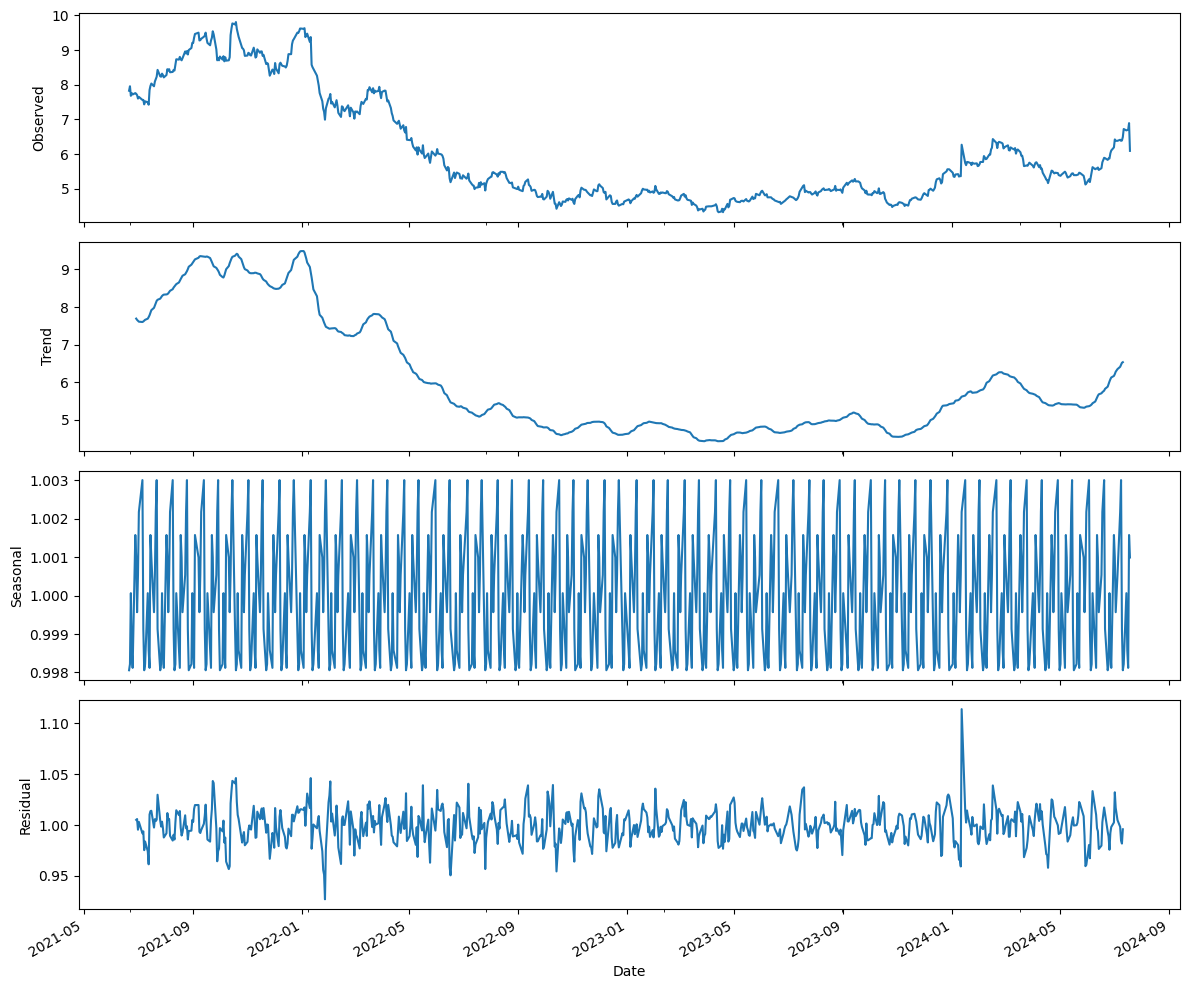

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(df['Adj Close'], model='multiplicative', period=12)

# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
result.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
result.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

In [13]:
# Split the data into training and test sets
train_data, test_data = train_test_split(df, test_size=0.2, shuffle=False)

#3. Univariate Forecasting - Conventional Models/Statistical Models

#Holt Winters model

In [14]:
monthly_data = df.resample("M").mean()

# Split the data into training and test sets
train_data, test_data = train_test_split(monthly_data, test_size=0.2, shuffle=False)
len(monthly_data), len(train_data)

(38, 30)

In [15]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the Holt-Winters model
holt_winters_model = ExponentialSmoothing(train_data, seasonal='mul', seasonal_periods=12).fit()

# Forecast for the next year (12 months)
holt_winters_forecast = holt_winters_model.forecast(12)

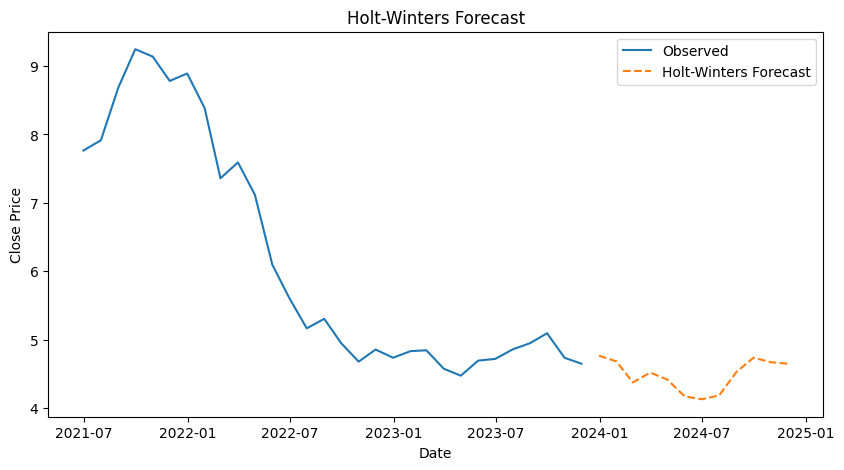

In [16]:
# Plot the forecast
plt.figure(figsize=(10, 5))
plt.plot(train_data, label='Observed')
plt.plot(holt_winters_forecast, label='Holt-Winters Forecast', linestyle='--')
plt.title('Holt-Winters Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [17]:
# Forecast for the next year (12 months)
y_pred = holt_winters_model.forecast(8)

In [18]:
len(test_data), len(y_pred)

(8, 8)

In [19]:
y_pred, test_data

(2023-12-31    4.765089
 2024-01-31    4.681370
 2024-02-29    4.374163
 2024-03-31    4.517837
 2024-04-30    4.416468
 2024-05-31    4.170000
 2024-06-30    4.128488
 2024-07-31    4.183594
 Freq: M, dtype: float64,
             Adj Close
 Date                 
 2023-12-31   5.164200
 2024-01-31   5.615565
 2024-02-29   6.081000
 2024-03-31   5.989500
 2024-04-30   5.493636
 2024-05-31   5.377727
 2024-06-30   5.661579
 2024-07-31   6.486429)

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(test_data, y_pred))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(test_data, y_pred)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((test_data - y_pred) / test_data)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(test_data, y_pred)
print(f'R-squared: {r2}')

RMSE: 1.431057703027581
MAE: 1.3290785703102876
MAPE: nan
R-squared: -11.79468272276221


In [21]:
# Forecast for the next year (12 months)
holt_winters_forecast = holt_winters_model.forecast(len(test_data)+12)

In [22]:
holt_winters_forecast

2023-12-31    4.765089
2024-01-31    4.681370
2024-02-29    4.374163
2024-03-31    4.517837
2024-04-30    4.416468
2024-05-31    4.170000
2024-06-30    4.128488
2024-07-31    4.183594
2024-08-31    4.529716
2024-09-30    4.735464
2024-10-31    4.669215
2024-11-30    4.647424
2024-12-31    4.765089
2025-01-31    4.681370
2025-02-28    4.374163
2025-03-31    4.517837
2025-04-30    4.416468
2025-05-31    4.170000
2025-06-30    4.128488
2025-07-31    4.183594
Freq: M, dtype: float64

#3.2 ARIMA Monthly Data

In [24]:
monthly_data.columns





Index(['Adj Close'], dtype='object')

In [26]:
!pip install pmdarima
from pmdarima.arima import auto_arima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.6 MB/s eta 0:00:00


In [27]:
# Fit auto_arima model
arima_model = auto_arima(train_data['Adj Close'],
                         seasonal=True,
                         m=12,  # Monthly seasonality
                         stepwise=True,
                         suppress_warnings=True)

# Print the model summary
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   30
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 -10.445
Date:                Sun, 21 Jul 2024   AIC                             28.891
Time:                        11:42:59   BIC                             34.360
Sample:                    06-30-2021   HQIC                            30.604
                         - 11-30-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.1445      0.128     -1.130      0.259      -0.395       0.106
ar.L1         -0.4382      0.214     -2.049      0.040      -0.857      -0.019
ma.L1          0.9640      0.520      1.853      0.0

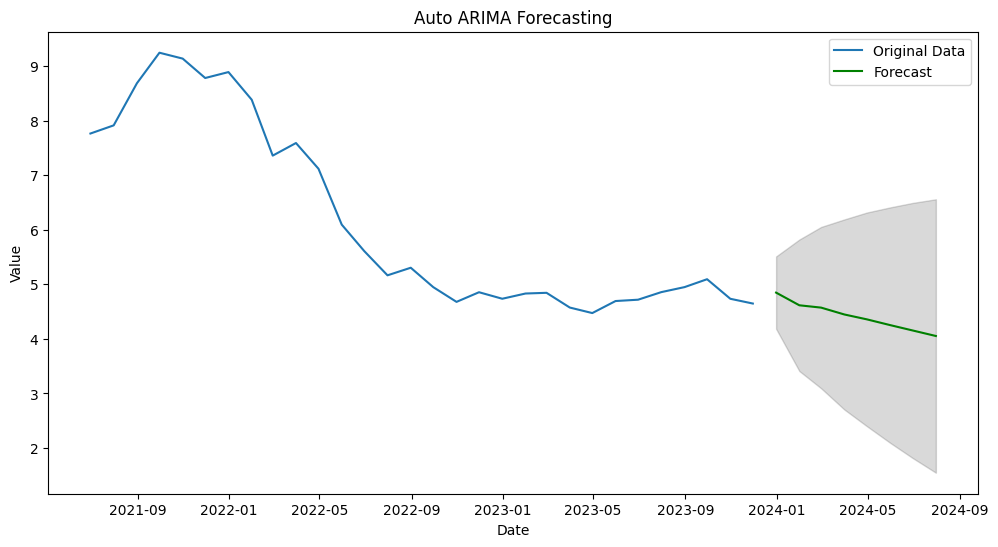

In [28]:
# Number of periods to forecast
n_periods = 8

# Generate forecast
forecast, conf_int = arima_model.predict(n_periods=n_periods, return_conf_int=True)

# Plot the original data, fitted values, and forecast
plt.figure(figsize=(12, 6))
plt.plot(train_data['Adj Close'], label='Original Data')
plt.plot(forecast.index, forecast, label='Forecast', color='green')
plt.fill_between(forecast.index,
                 conf_int[:, 0],
                 conf_int[:, 1],
                 color='k', alpha=.15)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Auto ARIMA Forecasting')
plt.show()

In [29]:
len(forecast)

8

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(test_data, forecast))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(test_data, forecast)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((test_data - forecast) / forecast)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(test_data, forecast)
print(f'R-squared: {r2}')

RMSE: 1.4366443008724326
MAE: 1.3214144117602378
MAPE: nan
R-squared: -11.894774098543692


#3.3 ARIMA Daily Data

In [31]:
daily_data= df.copy()

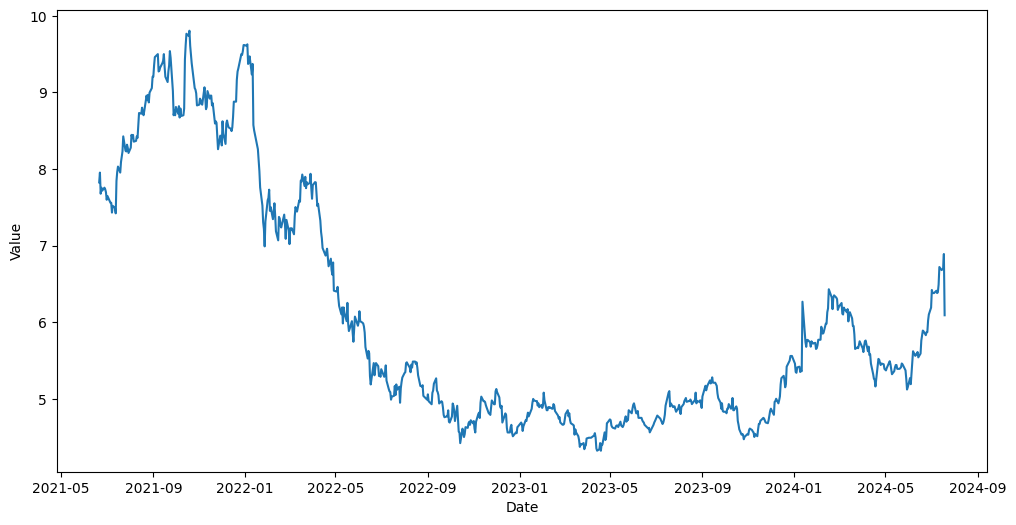

In [32]:
# Plot the original data, fitted values, and forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_data['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [33]:
# Fit auto_arima model
arima_model = auto_arima(daily_data['Adj Close'],
                         seasonal=True,
                         m=7,  # Weekly seasonality
                         stepwise=True,
                         suppress_warnings=True)

In [34]:
# Print the model summary
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  775
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 553.754
Date:                Sun, 21 Jul 2024   AIC                          -1105.508
Time:                        11:44:54   BIC                          -1100.857
Sample:                             0   HQIC                         -1103.719
                                - 775                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0140      0.000     49.931      0.000       0.013       0.015
Ljung-Box (L1) (Q):                   2.53   Jarque-Bera (JB):              3821.41
Prob(Q):                              0.11   Pr

In [35]:
# Generate in-sample predictions
fitted_values = arima_model.predict_in_sample()

In [36]:
fitted_values

Date
2021-06-21    0.000000
2021-06-22    7.825024
2021-06-23    7.953141
2021-06-24    7.677196
2021-06-25    7.756037
                ...   
2024-07-15    6.720000
2024-07-16    6.680000
2024-07-17    6.690000
2024-07-18    6.700000
2024-07-19    6.890000
Name: predicted_mean, Length: 775, dtype: float64

In [37]:
# Number of periods to forecast
n_periods = 60  # For example, forecast the next 30 days

# Generate forecast
forecast, conf_int = arima_model.predict(n_periods=n_periods, return_conf_int=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [38]:
len(forecast)

60

In [40]:
# Create future dates index
last_date = daily_data.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_periods)

# Convert forecast to a DataFrame with future_dates as the index
forecast_df = pd.DataFrame(forecast.values, index=future_dates, columns=['forecast'])
conf_int_df = pd.DataFrame(conf_int, index=future_dates, columns=['lower_bound', 'upper_bound'])

In [41]:
len(future_dates)

60

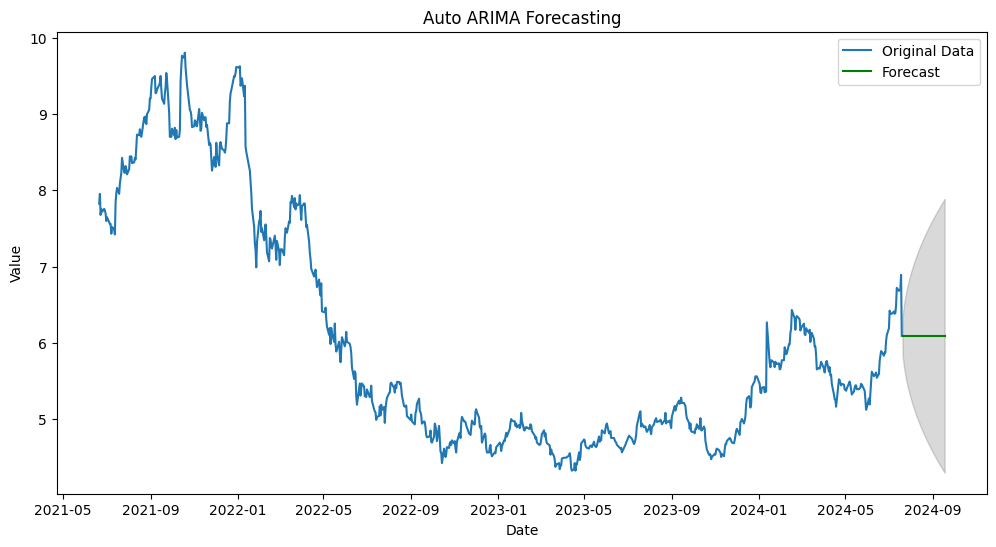

In [42]:

# Plot the original data, fitted values, and forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_data['Adj Close'], label='Original Data')
plt.plot(forecast_df, label='Forecast', color='green')
plt.fill_between(future_dates,
                 conf_int_df['lower_bound'],
                 conf_int_df['upper_bound'],
                 color='k', alpha=.15)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Auto ARIMA Forecasting')
plt.show()

#2. Multivariate Forecasting - Machine Learning Models

In [43]:
pip install tensorflow

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

In [46]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-21,7.89,7.95,7.85,7.94,7.825024,1572000
2021-06-22,7.98,8.09,7.98,8.07,7.953141,2026600
2021-06-23,7.91,7.91,7.78,7.79,7.677196,1860200
2021-06-24,7.95,7.97,7.87,7.87,7.756037,1551900
2021-06-25,7.90,7.92,7.81,7.83,7.716616,1377800


In [47]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Select features (excluding 'Adj Close') and target ('Adj Close')
features = data.drop(columns=['Adj Close'])
target = data[['Adj Close']]

# Fit the scaler on features and target
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target)

# Create DataFrame with scaled features and target
scaled_df = pd.DataFrame(scaled_features, columns=features.columns, index=df.index)
scaled_df['Adj Close'] = scaled_target

In [48]:
# Function to create sequences
def create_sequences(scaled_df, target_col, sequence_length):
    sequences = []
    labels = []
    for i in range(len(scaled_df) - sequence_length):
        sequences.append(scaled_df[i:i + sequence_length])
        labels.append(scaled_df[i + sequence_length, target_col])  # Target column index
    return np.array(sequences), np.array(labels)

# Convert DataFrame to NumPy array
data_array = scaled_df.values

# Define the target column index and sequence length
target_col = scaled_df.columns.get_loc('Adj Close')
sequence_length = 30

# Create sequences
X, y = create_sequences(data_array, target_col, sequence_length)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (745, 30, 6)
Shape of y: (745,)


In [49]:
# Split the data into training and testing sets (80% training, 20% testing)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 6)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))


In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 50)            11400     
                                                                 
 dropout (Dropout)           (None, 30, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 31651 (123.64 KB)
Trainable params: 31651 (123.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), shuffle=False)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

Epoch 1/20
19/19 [==============================] - 8s 82ms/step - loss: 0.1046 - val_loss: 0.0114
Epoch 2/20
19/19 [==============================] - 1s 51ms/step - loss: 0.0130 - val_loss: 0.0233
Epoch 3/20
19/19 [==============================] - 1s 53ms/step - loss: 0.0440 - val_loss: 0.0142
Epoch 4/20
19/19 [==============================] - 1s 58ms/step - loss: 0.0140 - val_loss: 0.0112
Epoch 5/20
19/19 [==============================] - 1s 42ms/step - loss: 0.0261 - val_loss: 0.0042
Epoch 6/20
19/19 [==============================] - 1s 33ms/step - loss: 0.0074 - val_loss: 0.0036
Epoch 7/20
19/19 [==============================] - 1s 32ms/step - loss: 0.0085 - val_loss: 0.0024
Epoch 8/20
19/19 [==============================] - 1s 34ms/step - loss: 0.0057 - val_loss: 0.0036
Epoch 9/20
19/19 [==============================] - 1s 33ms/step - loss: 0.0080 - val_loss: 0.0023
Epoch 10/20
19/19 [==============================] - 1s 35ms/step - loss: 0.0057 - val_loss: 0.0046
Epoch 11/

In [52]:
# Predict on the test set
y_pred = model.predict(X_test)

# Inverse transform the predictions and true values to get them back to the original scale
y_test_scaled = scaler.inverse_transform(np.concatenate((np.zeros((len(y_test), 5)), y_test.reshape(-1, 1)), axis=1))[:, 5]
y_pred_scaled = scaler.inverse_transform(np.concatenate((np.zeros((len(y_pred), 5)), y_pred), axis=1))[:, 5]

5/5 [==============================] - 2s 20ms/step


In [53]:
# Print some predictions and true values
print("Predictions vs True Values:")
for i in range(10):
    print(f"Prediction: {y_pred_scaled[i]}, True Value: {y_test_scaled[i]}")

Predictions vs True Values:
Prediction: 4.805456185857068, True Value: 5.18914794921875
Prediction: 4.831295118198465, True Value: 5.268980979919434
Prediction: 4.867662666700095, True Value: 5.2989182472229
Prediction: 4.912516466911821, True Value: 5.249022960662842
Prediction: 4.953808746740293, True Value: 5.149231433868408
Prediction: 4.982323263556136, True Value: 5.18914794921875
Prediction: 5.002205595863767, True Value: 5.418667793273926
Prediction: 5.028363774079956, True Value: 5.498501300811768
Prediction: 5.072415618192487, True Value: 5.5583758354187
Prediction: 5.122657775492641, True Value: 5.5583758354187


In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test_scaled, y_pred_scaled))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(y_test_scaled, y_pred_scaled)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((y_test_scaled - y_pred_scaled) / y_pred_scaled)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(y_test_scaled, y_pred_scaled)
print(f'R-squared: {r2}')

RMSE: 0.36123218349700376
MAE: 0.3112696908131494
MAPE: 5.720620393262157
R-squared: 0.16342987796164354


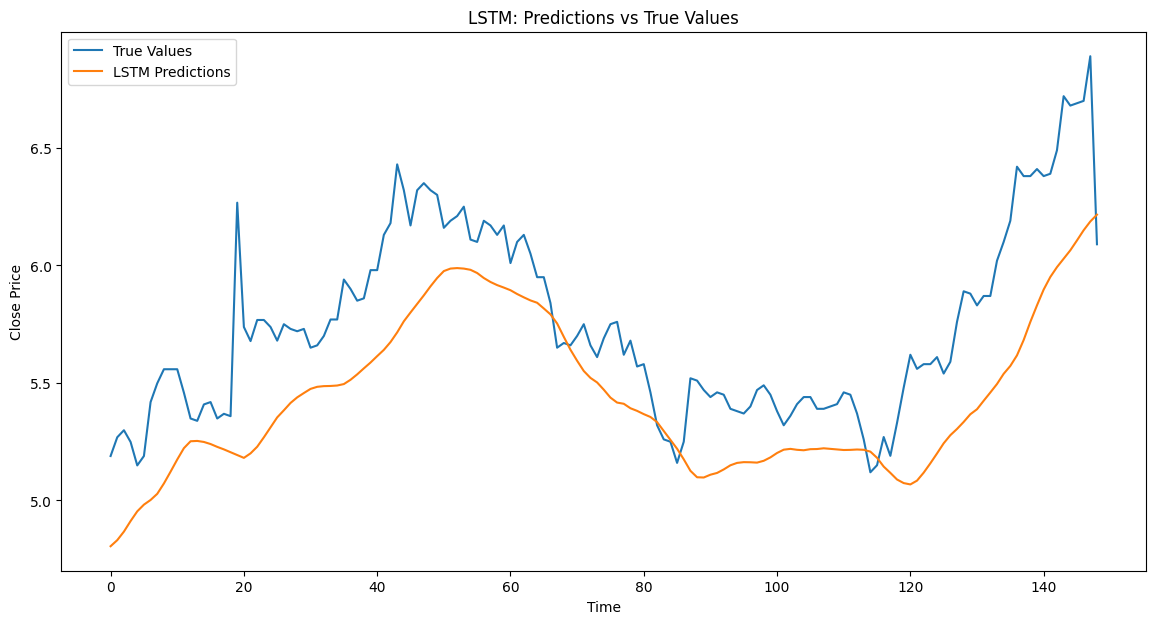

In [55]:
# Plot the predictions vs true values
plt.figure(figsize=(14, 7))
plt.plot(y_test_scaled, label='True Values')
plt.plot(y_pred_scaled, label='LSTM Predictions')
plt.title('LSTM: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

#Tree Based Models

In [56]:
from sklearn.ensemble import RandomForestRegressor #ensemble model
from sklearn.tree import DecisionTreeRegressor #simple algo
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [57]:
def create_sequences(data, target_col, sequence_length):
    """
    Create sequences of features and labels for time series data.

    Parameters:
    - data (np.ndarray): The input data where the last column is the target.
    - target_col (int): The index of the target column in the data.
    - sequence_length (int): The length of each sequence.

    Returns:
    - np.ndarray: 3D array of sequences (samples, sequence_length, num_features)
    - np.ndarray: 1D array of target values
    """
    num_samples = len(data) - sequence_length
    num_features = data.shape[1]

    sequences = np.zeros((num_samples, sequence_length, num_features))
    labels = np.zeros(num_samples)

    for i in range(num_samples):
        sequences[i] = data[i:i + sequence_length]
        labels[i] = data[i + sequence_length, target_col]  # Target is specified column

    return sequences, labels

# Example usage
sequence_length = 30

# Convert DataFrame to NumPy array
data_array = scaled_df.values

# Define the target column index
target_col = scaled_df.columns.get_loc('Adj Close')

# Create sequences
X, y = create_sequences(data_array, target_col, sequence_length)

# Flatten X for Decision Tree
num_samples, seq_length, num_features = X.shape
X_flattened = X.reshape(num_samples, seq_length * num_features)

In [58]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_flattened, y, test_size=0.2, random_state=42)

In [59]:

# Train Decision Tree model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f'MSE (Decision Tree): {mse_dt}')

MSE (Decision Tree): 0.0011642841105563432


In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(y_test, y_pred_dt)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((y_test - y_pred_scaled) / y_pred_dt)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(y_test, y_pred_dt)
print(f'R-squared: {r2}')

RMSE: 0.03412160767836626
MAE: 0.023905001172202674
MAPE: 5372.363563022141
R-squared: 0.9861677258827852


In [61]:
# Train and evaluate the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Mean Squared Error: {mse_rf}")

Random Forest Mean Squared Error: 0.0007008097770880589


In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(y_test, y_pred_rf)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((y_test - y_pred_scaled) / y_pred_rf)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(y_test, y_pred_rf)
print(f'R-squared: {r2}')

RMSE: 0.026472812035899376
MAE: 0.01824525132387173
MAPE: 5058.567353222801
R-squared: 0.9916740314045219


In [63]:
# Print some predictions and true values for both models
print("\nDecision Tree Predictions vs True Values:")
for i in range(10):
    print(f"Prediction: {y_pred_dt[i]}, True Value: {y_test[i]}")


Decision Tree Predictions vs True Values:
Prediction: 0.3030237644270546, True Value: 0.29757882028702465
Prediction: 0.20401935844905683, True Value: 0.21227440564155753
Prediction: 0.8832101558744794, True Value: 0.831103626157883
Prediction: 0.3810683694664796, True Value: 0.5297299844272443
Prediction: 0.08187150568197388, True Value: 0.061858432321714285
Prediction: 0.07641334734617655, True Value: 0.06367773149814815
Prediction: 0.20401935844905683, True Value: 0.16689963931331042
Prediction: 0.46455783171043596, True Value: 0.4591128875704058
Prediction: 0.22560126981466477, True Value: 0.22560126981466477
Prediction: 0.08914896319420496, True Value: 0.1142648025725258


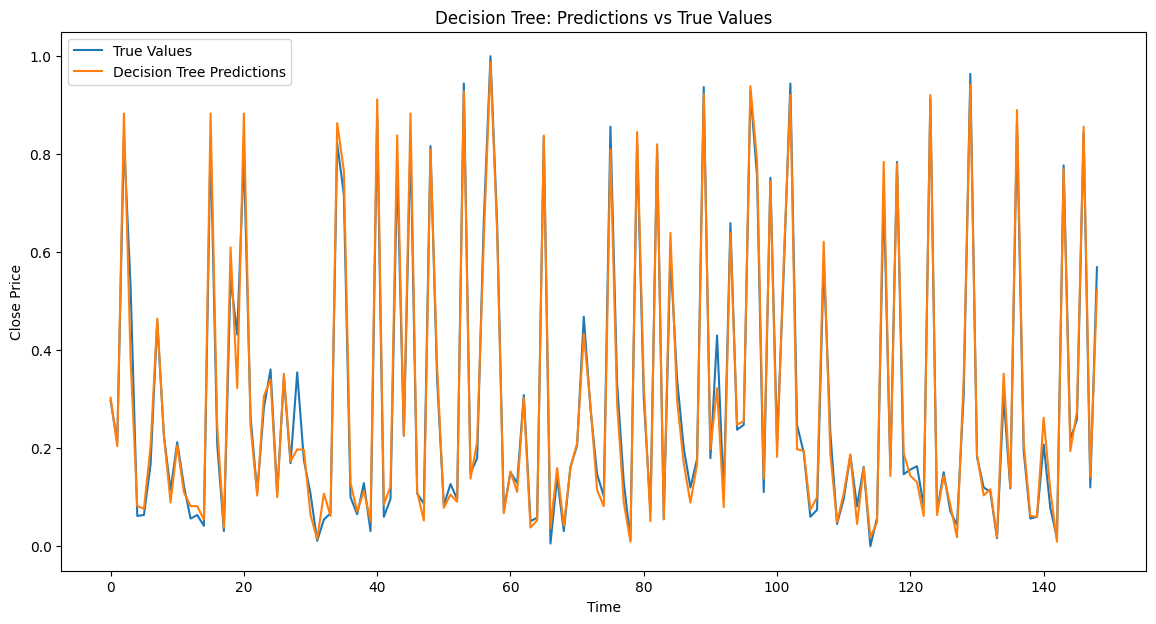

In [64]:
# Plot the predictions vs true values for Decision Tree
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred_dt, label='Decision Tree Predictions')
plt.title('Decision Tree: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [65]:
print("\nRandom Forest Predictions vs True Values:")
for i in range(10):
    print(f"Prediction: {y_pred_rf[i]}, True Value: {y_test[i]}")


Random Forest Predictions vs True Values:
Prediction: 0.30472012116026576, True Value: 0.29757882028702465
Prediction: 0.19765283543171006, True Value: 0.21227440564155753
Prediction: 0.8525572485471125, True Value: 0.831103626157883
Prediction: 0.49754838677707597, True Value: 0.5297299844272443
Prediction: 0.06273833258235566, True Value: 0.061858432321714285
Prediction: 0.07520491870618078, True Value: 0.06367773149814815
Prediction: 0.19998501753619408, True Value: 0.16689963931331042
Prediction: 0.4530938379162397, True Value: 0.4591128875704058
Prediction: 0.21455480461637932, True Value: 0.22560126981466477
Prediction: 0.09894463260667145, True Value: 0.1142648025725258


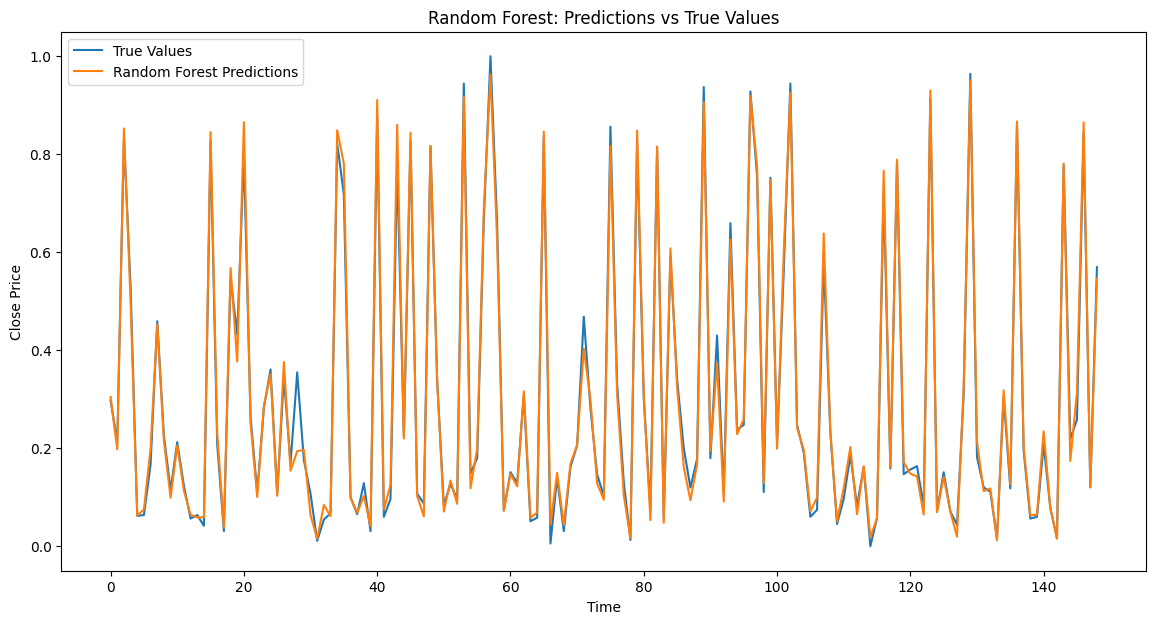

In [66]:
# Plot the predictions vs true values for Random Forest
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred_rf, label='Random Forest Predictions')
plt.title('Random Forest: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

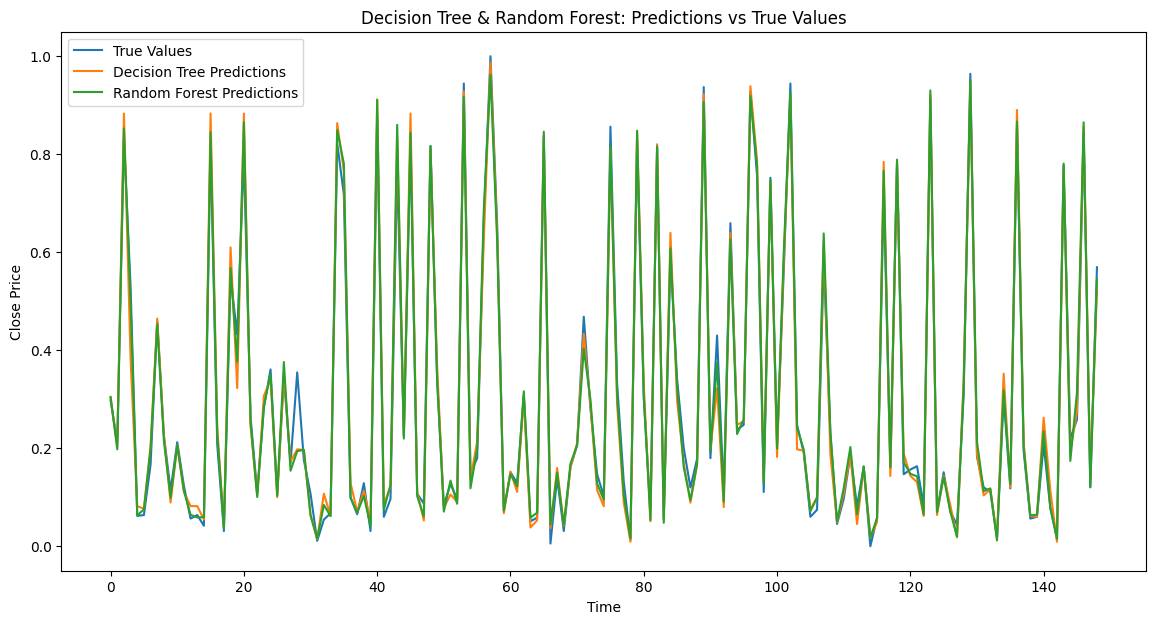

In [67]:
# Plot both Decision Tree and Random Forest predictions together
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred_dt, label='Decision Tree Predictions')
plt.plot(y_pred_rf, label='Random Forest Predictions')
plt.title('Decision Tree & Random Forest: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()